In [1]:
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from main import nmf
np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
def zeros_mask(arr):
    m, n = arr.shape
    indices = np.random.choice(m * n, replace=False, size=int(m * n * 0.2))
    arr[np.unravel_index(indices, (m, n))] = 0
    return arr

In [4]:
mat = scipy.io.loadmat('Urban.mat')
X = mat['X']

In [5]:
m, n = X.shape # (162, 94249)
num_col = int(math.sqrt(n)) # 307

In [6]:
X3d = X.reshape(m, num_col, num_col, order='F') # order specified to match MATLAB

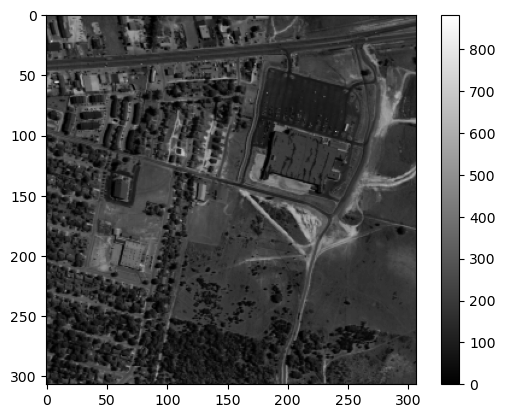

In [7]:
plt.imshow(X3d[100, :, :], cmap='gray')
plt.colorbar()

## Small scale test

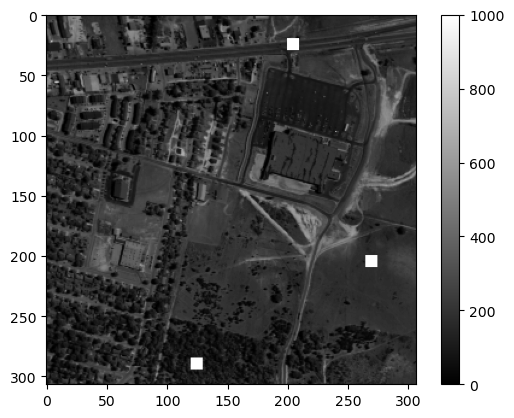

In [8]:
img = X3d[100, :, :].copy()
img[285: 295, 120: 130] = 1000 # trees
img[200: 210, 265: 275] = 1000 # grass
img[20: 30, 200: 210] = 1000 # asphalt
plt.imshow(img, cmap='gray')
plt.colorbar()

In [9]:
trees3d = X3d[:, 285: 295, 120: 130] # (162, 10, 10)
grass3d = X3d[:, 200: 210, 265: 275] # (162, 10, 10)
asphalt3d = X3d[:, 20: 30, 200: 210] # (162, 10, 10)

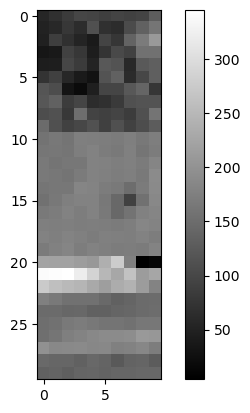

In [10]:
smallX3d = np.hstack([trees3d, grass3d, asphalt3d]) # (162, 30, 10)
plt.imshow(smallX3d[100, :, :], cmap='gray')
plt.colorbar()

In [11]:
smallX = smallX3d.reshape(m, -1, order='F') # (162, 300)

In [12]:
r = 6
iterations = 1000
_lambda = 0.4

In [13]:
m, n = smallX.shape
W_ini = zeros_mask(np.random.rand(m, r))
H_ini = zeros_mask(np.random.rand(r, n))
Wb, Hb, Wl, Hl, fscores, gscores = nmf(smallX, W_ini, H_ini, _lambda=_lambda, itermax=iterations)

Iteration: 1, f=6182.969912620351, g=3291.899389643636,  total=7499.729668477806
Iteration: 2, f=3817.670952488985, g=2760.2623702309456,  total=4921.775900581363
Iteration: 3, f=2508.6612063957346, g=2433.0782757621655,  total=3481.892516700601


In [14]:
with open(f'small_r{r}_it{iterations}.npz', 'wb') as fout:
    np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores)

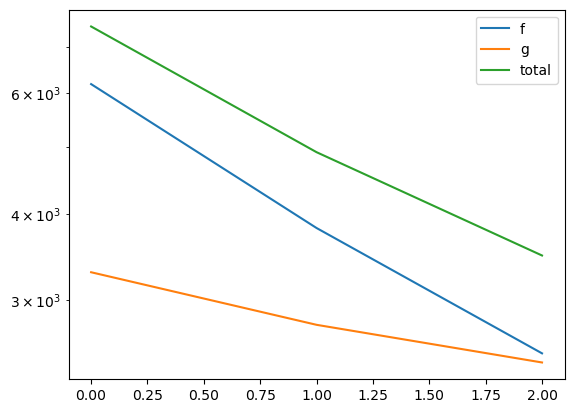

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + _lambda * gscores)
ax.legend(['f', 'g', 'total'])

In [16]:
W_ins = Wl

n = np.ones(shape=(r, r)) * -1
for i in range(r):
    for j in range(r):
        n[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
    n[i, :] = n[i, :] / sum(n[i, :])
    print(n[i, :])

[0.         0.10029826 0.10041232 0.48895191 0.02175833 0.06875618
 0.02103773 0.19878527]
[0.08423671 0.         0.14858274 0.36614109 0.09624572 0.06773753
 0.0955724  0.14148381]
[0.06965355 0.12272037 0.         0.37606502 0.07183692 0.10996692
 0.07202679 0.17773044]
[0.1527846  0.13622409 0.16940261 0.         0.15768934 0.1341083
 0.15753978 0.09225127]
[0.02090939 0.11012588 0.09951931 0.48495879 0.         0.07606507
 0.00225833 0.20616324]
[0.06607121 0.0775036  0.15233732 0.41242287 0.07606237 0.
 0.07564004 0.1399626 ]
[0.02026858 0.10963493 0.10003736 0.48573707 0.0022641  0.07583604
 0.         0.20622192]
[0.1331518  0.11283962 0.1716202  0.19775241 0.14370046 0.09756058
 0.14337494 0.        ]


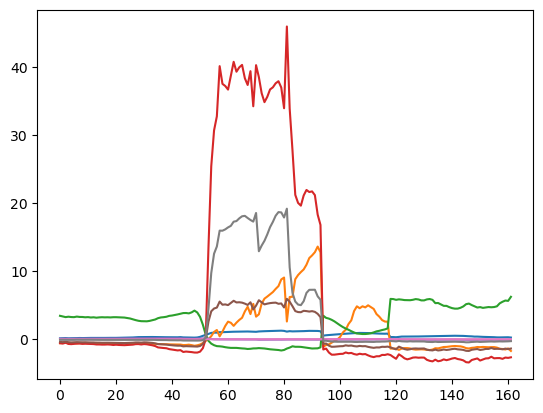

In [17]:
plt.plot(W_ins)

In [18]:
# plt.imshow(Hl[0, :].reshape(30, 10, order='F'), cmap='gray')
# plt.colorbar()

In [19]:
# plt.imshow(Hl[1, :].reshape(30, 10, order='F'), cmap='gray')
# plt.colorbar()

## Medium scale test, expected r = 3

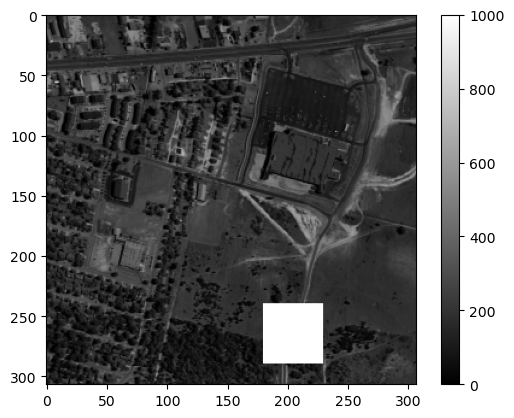

In [20]:
img = X3d[100, :, :].copy()
img[240: 290, 180: 230] = 1000 # trees
plt.imshow(img, cmap='gray')
plt.colorbar()

In [21]:
medX3d = X3d[:, 240: 290, 180: 230] # (162, 50, 50)
medX = medX3d.reshape(m, -1, order='F') # (162, 2500)

In [22]:
r = 8
iterations = 1000
_lambda = 0.4

In [23]:
m, n = medX.shape
W_ini = zeros_mask(np.random.rand(m, r))
H_ini = zeros_mask(np.random.rand(r, n))
Wb, Hb, Wl, Hl, fscores, gscores = nmf(medX, W_ini, H_ini, _lambda=_lambda, itermax=iterations)

Iteration: 1, f=22797.88098578558, g=2295.9469367668285,  total=23716.259760492314
Iteration: 2, f=9378.694477265568, g=2228.3821691100507,  total=10270.047344909588
Iteration: 3, f=5441.952410527561, g=2056.6541994711497,  total=6264.614090316021


In [24]:
with open(f'med_r{r}_it{iterations}.npz', 'wb') as fout:
    np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores)

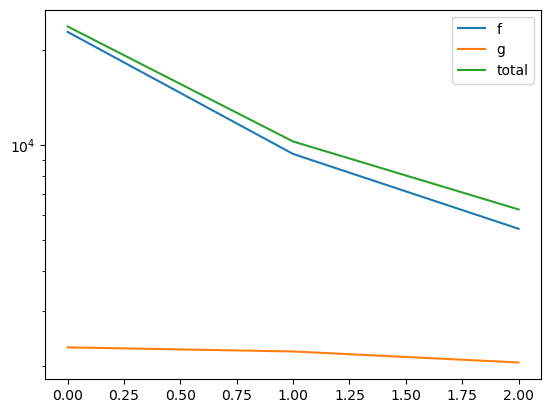

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + _lambda * gscores)
ax.legend(['f', 'g', 'total'])

In [26]:
W_ins = Wl

n = np.ones(shape=(r, r)) * -1
for i in range(r):
    for j in range(r):
        n[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
    n[i, :] = n[i, :] / sum(n[i, :])
    print(n[i, :])

[0.         0.12570126 0.24740593 0.22441939 0.0269483  0.19069842
 0.10953838 0.07528831]
[0.0843802  0.         0.22046046 0.21386224 0.09592334 0.18371438
 0.09336811 0.10829126]
[0.1449578  0.19242492 0.         0.10901267 0.15066627 0.08390398
 0.1886454  0.13038895]
[0.13375514 0.18988179 0.11089081 0.         0.13694645 0.12711959
 0.19102472 0.1103815 ]
[0.02594829 0.13759439 0.2476064  0.22124731 0.         0.18878084
 0.09813477 0.080688  ]
[0.13093748 0.18791399 0.0983259  0.14644658 0.13461624 0.
 0.17206519 0.12969463]
[0.07774657 0.0987217  0.22852285 0.22748585 0.072337   0.17786524
 0.         0.11732079]
[0.06956108 0.14904976 0.20561181 0.17111377 0.07742308 0.17451947
 0.15272103 0.        ]


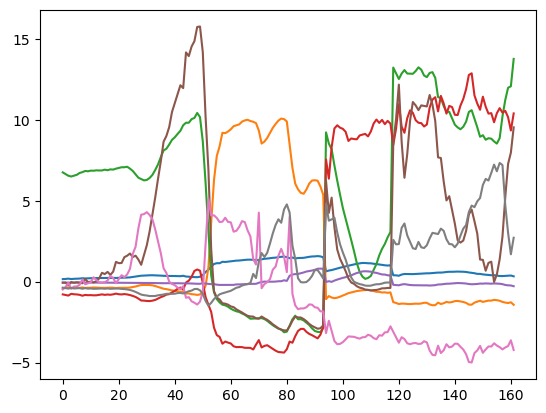

In [27]:
plt.plot(W_ins)

In [28]:
# plt.imshow(Hl[1, :].reshape(50, 50, order='F'), cmap='gray')
# plt.colorbar()

## Full size test

In [29]:
r = 16
iterations = 1000
_lambda = 0.4

In [30]:
m,n = X.shape
W_ini = zeros_mask(np.random.rand(m, r))
H_ini = zeros_mask(np.random.rand(r, n))
Wb, Hb, Wl, Hl, fscores, gscores = nmf(X, W_ini, H_ini, _lambda=_lambda, itermax=iterations)

Iteration: 1, f=132546.16495242293, g=15802.827566869102,  total=138867.29597917057
Iteration: 2, f=63350.92333397339, g=16905.207550370324,  total=70113.00635412152
Iteration: 3, f=37191.87426883079, g=14118.956946433169,  total=42839.45704740406


In [31]:
with open(f'full_r{r}_it{iterations}.npz', 'wb') as fout:
    np.savez_compressed(fout, Wb=Wb, Hb=Hb, Wl=Wl, Hl=Hl, fscores=fscores, gscores=gscores)

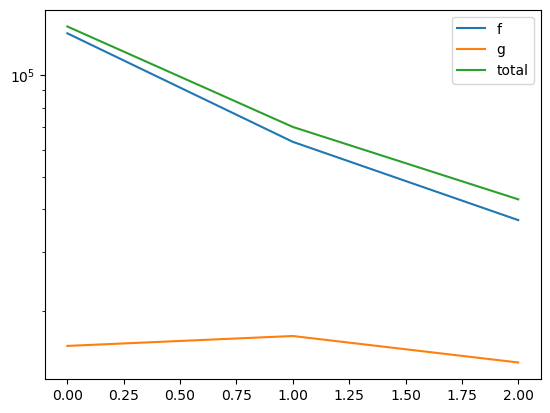

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + _lambda * gscores)
ax.legend(['f', 'g', 'total'])

In [33]:
W_ins = Wl

n = np.ones(shape=(r, r)) * -1
for i in range(r):
    for j in range(r):
        n[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
    n[i, :] = n[i, :] / sum(n[i, :])
    print(n[i, :])

[0.         0.03481811 0.07119981 0.16707806 0.08884662 0.04488218
 0.1112029  0.06600057 0.01105209 0.01383017 0.02619451 0.07273375
 0.05992996 0.03384006 0.05732788 0.14106336]
[0.0295418  0.         0.07822968 0.15626174 0.08840734 0.05961311
 0.06829295 0.0698661  0.03549361 0.03016248 0.04458257 0.07130867
 0.0549923  0.05344014 0.0656692  0.09413832]
[0.0479586  0.06210513 0.         0.10821947 0.08321875 0.03926117
 0.10224105 0.0434585  0.04878166 0.05535313 0.05091694 0.08647696
 0.07647529 0.04408102 0.04151252 0.10993981]
[0.06064604 0.06685037 0.05831774 0.         0.04449299 0.04582398
 0.08847695 0.07608767 0.06199231 0.06398835 0.05947341 0.07926495
 0.07936811 0.04982624 0.07074212 0.0946488 ]
[0.05013049 0.0587919  0.06970991 0.06916233 0.         0.04339403
 0.0998635  0.07770872 0.05168855 0.05158152 0.05460277 0.07364062
 0.07521416 0.0432154  0.06868123 0.11261488]
[0.03661372 0.05731652 0.04754944 0.10298634 0.06273917 0.
 0.11613599 0.07304261 0.03911215 0.04566

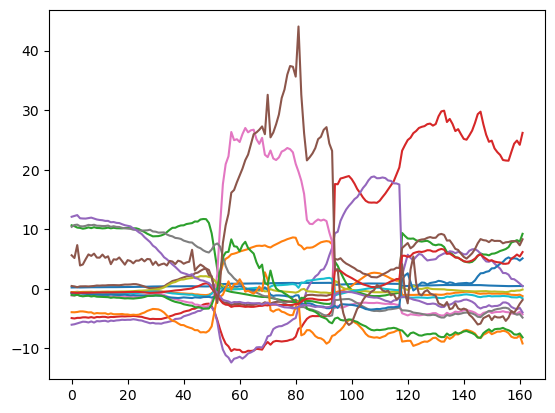

In [34]:
plt.plot(W_ins)

In [35]:
# plt.imshow(Hl[1, :].reshape(50, 50, order='F'), cmap='gray')
# plt.colorbar()

## Medium scale test, expected r = 3

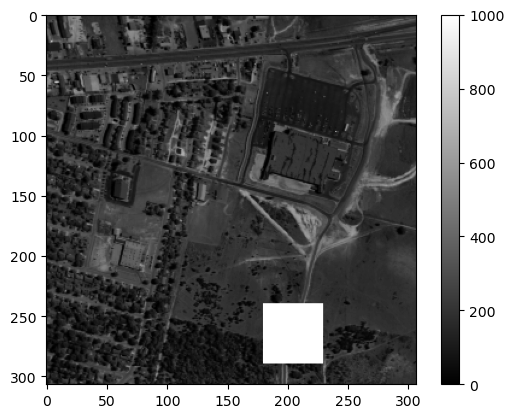

In [19]:
img = X3d[100, :, :].copy()
img[240: 290, 180: 230] = 1000 # trees
plt.imshow(img, cmap='gray')
plt.colorbar()

In [20]:
medX3d = X3d[:, 240: 290, 180: 230] # (162, 50, 50)
medX = medX3d.reshape(m, -1, order='F') # (162, 2500)

In [21]:
m,n = medX.shape
r = 6
W_ini = zeros_mask(np.random.rand(m, r))
H_ini = zeros_mask(np.random.rand(r, n))

In [27]:
_lambda = 1
Wb, Hb, Wl, Hl, fscores, gscores = nmf(medX, Wl.copy(), Hl.copy(), _lambda=_lambda, itermax=1000)

Iteration: 1, f=2209.908019806031, g=564.0801374558049,  total=2773.988157261836
Iteration: 2, f=2209.82282347174, g=563.9738466017626,  total=2773.7966700735024
Iteration: 3, f=2209.7376686863663, g=563.8676466224655,  total=2773.605315308832
Iteration: 4, f=2209.652560122748, g=563.761533016178,  total=2773.414093138926
Iteration: 5, f=2209.5674975941406, g=563.655505030167,  total=2773.223002624308
Iteration: 6, f=2209.4824816863284, g=563.5495631735711,  total=2773.0320448598995
Iteration: 7, f=2209.3975081179624, g=563.4437084457116,  total=2772.841216563674
Iteration: 8, f=2209.312580127411, g=563.3379407653437,  total=2772.6505208927547
Iteration: 9, f=2209.2276993005585, g=563.2322550564598,  total=2772.4599543570184
Iteration: 10, f=2209.1428701248983, g=563.1266540399232,  total=2772.2695241648216
Iteration: 11, f=2209.058093711342, g=563.0211381609391,  total=2772.079231872281
Iteration: 12, f=2208.9733689157088, g=562.9157076430831,  total=2771.889076558792
Iteration: 13, f

Iteration: 100, f=2201.7292336092332, g=553.9693875460341,  total=2755.6986211552676
Iteration: 101, f=2201.6493890613797, g=553.871023180813,  total=2755.520412242193
Iteration: 102, f=2201.569730758258, g=553.7727203161953,  total=2755.3424510744535
Iteration: 103, f=2201.4901733179872, g=553.6744806777424,  total=2755.1646539957296
Iteration: 104, f=2201.4106841917474, g=553.5763044795967,  total=2754.986988671344
Iteration: 105, f=2201.331257866013, g=553.4781913461474,  total=2754.8094492121604
Iteration: 106, f=2201.2518983685063, g=553.3801409133596,  total=2754.632039281866
Iteration: 107, f=2201.1726108683924, g=553.2821529249281,  total=2754.4547637933206
Iteration: 108, f=2201.093399074019, g=553.1842272807189,  total=2754.277626354738
Iteration: 109, f=2201.0142649726245, g=553.0863639828717,  total=2754.100628955496
Iteration: 110, f=2200.9352092777467, g=552.9885631065223,  total=2753.923772384269
Iteration: 111, f=2200.85623112996, g=552.8908249917797,  total=2753.747056

Iteration: 198, f=2194.3087670596237, g=544.6058190390571,  total=2738.914586098681
Iteration: 199, f=2194.2372906431256, g=544.5131132907632,  total=2738.7504039338887
Iteration: 200, f=2194.165903799311, g=544.4204697893849,  total=2738.586373588696
Iteration: 201, f=2194.094606577651, g=544.3278886513876,  total=2738.4224952290388
Iteration: 202, f=2194.0233978114475, g=544.2353700871321,  total=2738.2587678985797
Iteration: 203, f=2193.952276289345, g=544.1429144373428,  total=2738.0951907266876
Iteration: 204, f=2193.881243956957, g=544.0505214405747,  total=2737.9317653975318
Iteration: 205, f=2193.8103015333345, g=543.9581908884701,  total=2737.7684924218047
Iteration: 206, f=2193.7394495021435, g=543.8659226157315,  total=2737.605372117875
Iteration: 207, f=2193.6686881509286, g=543.7737165209592,  total=2737.4424046718877
Iteration: 208, f=2193.598077347787, g=543.6814990563432,  total=2737.2795764041302
Iteration: 209, f=2193.527597730481, g=543.5892934819271,  total=2737.116

Iteration: 296, f=2187.7944362242006, g=535.7703332893622,  total=2723.5647695135626
Iteration: 297, f=2187.7329036890274, g=535.6829859033846,  total=2723.415889592412
Iteration: 298, f=2187.6714576860345, g=535.5956984027545,  total=2723.267156088789
Iteration: 299, f=2187.6100986100128, g=535.5084706763247,  total=2723.1185692863373
Iteration: 300, f=2187.548826706572, g=535.4213025330398,  total=2722.970129239612
Iteration: 301, f=2187.487642295915, g=535.3341937836931,  total=2722.821836079608
Iteration: 302, f=2187.42654521714, g=535.2471390853892,  total=2722.673684302529
Iteration: 303, f=2187.365469429892, g=535.1601315591421,  total=2722.525600989034
Iteration: 304, f=2187.3044820788264, g=535.0731722816952,  total=2722.377654360522
Iteration: 305, f=2187.2436248081362, g=534.986263696694,  total=2722.2298885048303
Iteration: 306, f=2187.182892632611, g=534.8994074502336,  total=2722.082300082845
Iteration: 307, f=2187.122272310062, g=534.8126046767982,  total=2721.9348769868

Iteration: 394, f=2182.241772363884, g=527.4652390969711,  total=2709.707011460855
Iteration: 395, f=2182.19000965172, g=527.3831942990312,  total=2709.573203950751
Iteration: 396, f=2182.138347005295, g=527.3012087757485,  total=2709.4395557810435
Iteration: 397, f=2182.086780792218, g=527.2192829072153,  total=2709.3060636994333
Iteration: 398, f=2182.035307343112, g=527.13741723762,  total=2709.172724580732
Iteration: 399, f=2181.9839257516524, g=527.0556120200565,  total=2709.0395377717086
Iteration: 400, f=2181.932637226163, g=526.9738670193766,  total=2708.9065042455395
Iteration: 401, f=2181.881442144381, g=526.8921820874207,  total=2708.7736242318015
Iteration: 402, f=2181.830340824208, g=526.8105571130028,  total=2708.640897937211
Iteration: 403, f=2181.7793336012296, g=526.7289920398722,  total=2708.5083256411017
Iteration: 404, f=2181.7284206986865, g=526.6474868493351,  total=2708.3759075480216
Iteration: 405, f=2181.6776023905913, g=526.5660415482258,  total=2708.243643938

Iteration: 492, f=2177.612504122875, g=519.7195896892263,  total=2697.3320938121014
Iteration: 493, f=2177.5699104034134, g=519.6435776277218,  total=2697.213488031135
Iteration: 494, f=2177.5273998915404, g=519.5676269158548,  total=2697.0950268073952
Iteration: 495, f=2177.484971056172, g=519.491738514457,  total=2696.9767095706293
Iteration: 496, f=2177.4426220130567, g=519.4159125562455,  total=2696.8585345693023
Iteration: 497, f=2177.400352972318, g=519.3401485186936,  total=2696.740501491012
Iteration: 498, f=2177.3581641918436, g=519.2644459979999,  total=2696.6226101898437
Iteration: 499, f=2177.316055722304, g=519.1888048375725,  total=2696.5048605598768
Iteration: 500, f=2177.274027299903, g=519.1132251830687,  total=2696.3872524829717
Iteration: 501, f=2177.232079176535, g=519.0377072402479,  total=2696.269786416783
Iteration: 502, f=2177.190211541708, g=518.9622509789477,  total=2696.1524625206557
Iteration: 503, f=2177.148424275175, g=518.8868563503027,  total=2696.035280

Iteration: 590, f=2173.8165172287554, g=512.5649093412279,  total=2686.3814265699834
Iteration: 591, f=2173.781724832033, g=512.4950230833728,  total=2686.276747915406
Iteration: 592, f=2173.7469998812603, g=512.4251970132837,  total=2686.172196894544
Iteration: 593, f=2173.712350481367, g=512.3554306843974,  total=2686.0677811657647
Iteration: 594, f=2173.6777805869474, g=512.2857239828181,  total=2685.9635045697655
Iteration: 595, f=2173.643291549989, g=512.2160769231726,  total=2685.859368473162
Iteration: 596, f=2173.6088836723256, g=512.1464894808728,  total=2685.7553731531984
Iteration: 597, f=2173.574556500867, g=512.0769617235857,  total=2685.6515182244525
Iteration: 598, f=2173.54030959119, g=512.0074936269166,  total=2685.5478032181068
Iteration: 599, f=2173.506142673601, g=511.9380852041208,  total=2685.444227877722
Iteration: 600, f=2173.4720556117154, g=511.86873642138977,  total=2685.340792033105
Iteration: 601, f=2173.4380490356752, g=511.79944852307887,  total=2685.2374

Iteration: 688, f=2170.785381607371, g=506.00337227092825,  total=2676.7887538782993
Iteration: 689, f=2170.7581756310287, g=505.9393484214205,  total=2676.6975240524494
Iteration: 690, f=2170.7310395698305, g=505.8753801522729,  total=2676.6064197221035
Iteration: 691, f=2170.7039734242226, g=505.8114672961483,  total=2676.515440720371
Iteration: 692, f=2170.6769772875487, g=505.74760969773905,  total=2676.4245869852875
Iteration: 693, f=2170.6500512393454, g=505.6838071816969,  total=2676.3338584210424
Iteration: 694, f=2170.6231951320738, g=505.6200596571788,  total=2676.2432547892527
Iteration: 695, f=2170.5964090296425, g=505.55636694137706,  total=2676.1527759710198
Iteration: 696, f=2170.5696940188977, g=505.49272906692835,  total=2676.062423085826
Iteration: 697, f=2170.5430479769675, g=505.42914551205945,  total=2675.9721934890267
Iteration: 698, f=2170.5164685450163, g=505.36561585762763,  total=2675.882084402644
Iteration: 699, f=2170.4899672096694, g=505.30213929569265,  to

Iteration: 786, f=2168.4361601446767, g=499.9650381833521,  total=2668.401198328029
Iteration: 787, f=2168.415005670212, g=499.90581106143156,  total=2668.3208167316434
Iteration: 788, f=2168.3939000194437, g=499.84663472124583,  total=2668.2405347406893
Iteration: 789, f=2168.3728422593545, g=499.7875084390994,  total=2668.160350698454
Iteration: 790, f=2168.351832614553, g=499.72843136324923,  total=2668.080263977802
Iteration: 791, f=2168.3308709792195, g=499.66940298085626,  total=2668.000273960076
Iteration: 792, f=2168.3099588284063, g=499.61042272538464,  total=2667.920381553791
Iteration: 793, f=2168.2890980916827, g=499.55149024315597,  total=2667.8405883348387
Iteration: 794, f=2168.2682853639853, g=499.49260609267435,  total=2667.76089145666
Iteration: 795, f=2168.247519127169, g=499.43377015232136,  total=2667.6812892794906
Iteration: 796, f=2168.2267984795517, g=499.37498238497096,  total=2667.601780864523
Iteration: 797, f=2168.206123652278, g=499.3162426110846,  total=26

Iteration: 884, f=2166.576456676314, g=494.3768572592928,  total=2660.953313935607
Iteration: 885, f=2166.559503472441, g=494.3219768446738,  total=2660.881480317115
Iteration: 886, f=2166.542586123198, g=494.26714137580746,  total=2660.8097274990055
Iteration: 887, f=2166.5257046209226, g=494.21235070110816,  total=2660.738055322031
Iteration: 888, f=2166.5088591632307, g=494.15760465858887,  total=2660.6664638218194
Iteration: 889, f=2166.492049811194, g=494.1029030970762,  total=2660.5949529082704
Iteration: 890, f=2166.475277505918, g=494.04824667532154,  total=2660.5235241812393
Iteration: 891, f=2166.4585422113746, g=493.9936361089608,  total=2660.4521783203354
Iteration: 892, f=2166.441843386467, g=493.93907105427746,  total=2660.3809144407446
Iteration: 893, f=2166.425181095865, g=493.88455093530877,  total=2660.3097320311736
Iteration: 894, f=2166.4085554190283, g=493.8300754222991,  total=2660.2386308413274
Iteration: 895, f=2166.3919660055117, g=493.77564428381385,  total=26

Iteration: 981, f=2165.0841930653214, g=489.25082885027285,  total=2654.335021915594
Iteration: 982, f=2165.07024969491, g=489.1999355970704,  total=2654.270185291981
Iteration: 983, f=2165.056333678935, g=489.1490798047737,  total=2654.205413483709
Iteration: 984, f=2165.0424449008265, g=489.0982613672342,  total=2654.1407062680605
Iteration: 985, f=2165.0285835616683, g=489.0474805244282,  total=2654.0760640860963
Iteration: 986, f=2165.01474913174, g=488.99673759768666,  total=2654.0114867294265
Iteration: 987, f=2165.000941858306, g=488.9460322602975,  total=2653.9469741186035
Iteration: 988, f=2164.987161702895, g=488.8953642198417,  total=2653.8825259227365
Iteration: 989, f=2164.973408722235, g=488.8447332554463,  total=2653.818141977681
Iteration: 990, f=2164.959682638951, g=488.7941392870751,  total=2653.7538219260264
Iteration: 991, f=2164.945983688825, g=488.74358217106374,  total=2653.6895658598887
Iteration: 992, f=2164.932312345873, g=488.69306259986996,  total=2653.62537

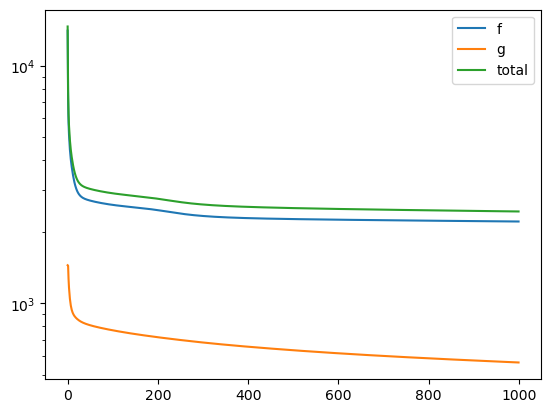

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + _lambda * gscores)
ax.legend(['f', 'g', 'total'])

In [24]:
W_ins = Wl

n = np.ones(shape=(r, r)) * -1
for i in range(r):
    for j in range(r):
        n[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
    n[i, :] = n[i, :] / sum(n[i, :])
    print(n[i, :])

[0.         0.28730558 0.12815848 0.12487039 0.03278066 0.42688489]
[0.1788538  0.         0.14069296 0.17321769 0.17632311 0.33091244]
[0.11026219 0.19444531 0.         0.16909384 0.11305483 0.41314383]
[0.11534468 0.2570255  0.18154598 0.         0.13082832 0.31525552]
[0.03181688 0.27491277 0.12754096 0.13746859 0.         0.4282608 ]
[0.19218857 0.23931821 0.21619159 0.15365312 0.1986485  0.        ]


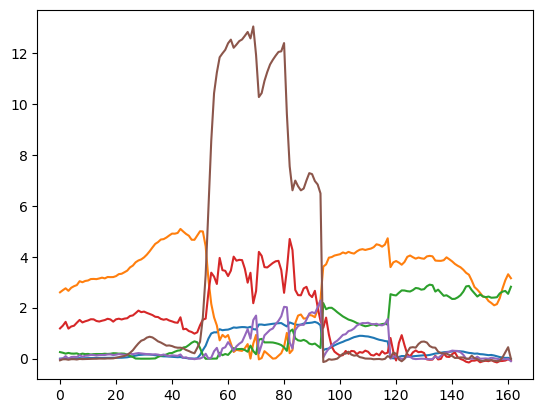

In [25]:
plt.plot(W_ins)

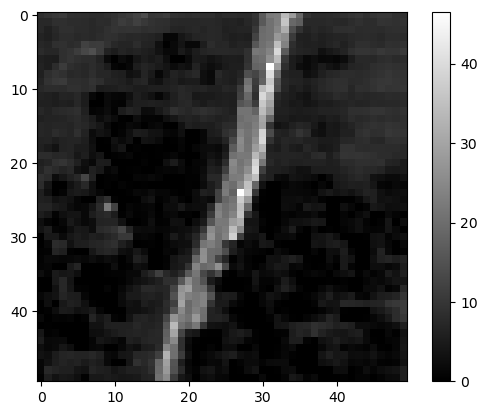

In [29]:
plt.imshow(Hl[1, :].reshape(50, 50, order='F'), cmap='gray')
plt.colorbar()